# Euler Method

## (1)Euler Method

We use Euler scheme to simulate a path for SDE of the form

$$X(t) = x_0 + \int_0^t \mu(X(s), s)ds + \int_0^t \sigma(X(s), s)dW(s).$$

__Ref__

[Hir13] Computational Methods in Finance

Section 6.6.1 of [Hir13] provides Euler schemem as follows:
One can produce a sequence of pairs $(t_j, \hat X_j): j = 0, 1, \ldots$ by

$$\hat X_{j+1} = \hat X_j + \mu(\hat X_j, t_j) \Delta t_j + \sigma(\hat X_j, t_j) \sqrt{\Delta t_j} Z_j,$$

where
$\Delta t_j = t_{j+1} - t_j$ and $(Z_j)_{j\ge 0}$ is iid standard normal variables.

We use P254-2-a of [Hir13] as an example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[lambda introduction](https://eastlakeside.gitbooks.io/interpy-zh/content/Lambdas/)

In [2]:
#define function Drif and Volatility
#Here we define as of P254-2-a of [Hir13] for the illustration
r = .0475; sig = .2
Mu = lambda x,t: r*x
Sigma = lambda x,t: sig*x
X0 = 100. #init state

In [3]:
#Construct (Xh(t_i): 1 <= i <= n) for simulation on [T1, T2]

T1, T2, n = 0., .5, 3 #init start time, end time, and the mesh number
t = np.linspace(T1, T2, num = n+1) #init mesh
Xh = X0 + np.zeros(n+1) #init state

for i in range(n):
    Xh[i+1] = Xh[i] + Mu(Xh[i], t[i]) * (t[i+1] - t[i]) + Sigma(Xh[i], t[i])* np.sqrt(t[i+1] - t[i])*np.random.normal()
print(Xh)

[100.          96.08177069  92.60052871  94.41351774]


__Generate multiple paths and plot__

In [4]:
def SDE_path(Mu, Sigma, X0, T1, T2, n): #para: drift, vol, initial state, start time, end time, and the mesh number 
    t = np.linspace(T1, T2, num = n+1) #init mesh 
    Xh = X0 + np.zeros(n+1) #init Xh
    for i in range(n): #run EM
        Xh[i+1] = Xh[i] + Mu(Xh[i], t[i]) * (t[i+1] - t[i]) + Sigma(Xh[i], t[i])* np.sqrt(t[i+1] - t[i])*np.random.normal()
    return t, Xh

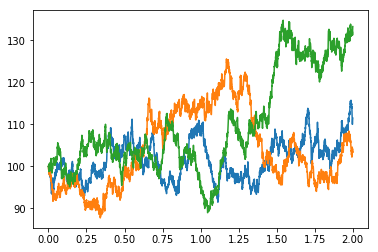

In [5]:
for i in range(3): 
    [t, Y] = SDE_path(Mu, Sigma, 100., 0., 2., 4000); 
    plt.plot(t,Y);

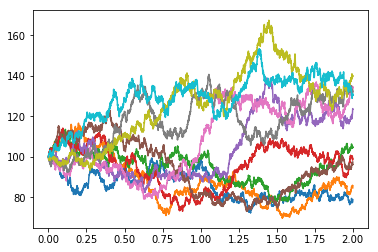

In [6]:
for i in range(10): 
    [t, Y] = SDE_path(Mu, Sigma, 100., 0., 2., 4000); 
    plt.plot(t,Y);

In [7]:
#Use MC to compute the put price of p254-2-a
#first define a function of Put payoff
def PutPay(r, T, K, S_T):
    return np.exp(-r*T)*max(0,K-S_T)

In [9]:
T = T2 - T1
K = 110.
MeshL = .0005
MeshN = int(T/MeshL)
IterN = 1000
PPay = np.zeros(IterN) #Simulation of payoff: to store the data of the payoff of each path or trajectory

for i in range(IterN):
    [t, Xh] = SDE_path(Mu, Sigma, X0, T1, T2, MeshN);
    PPay[i] = PutPay(r, T, K, Xh[-1])
    
PPrice = PPay.mean()
print(f"The price of the put option is {PPrice}.")

The price of the put option is 10.656040411743442.


## (2)Euler Method2

We use Euler scheme to simulate a path for SDE of the form

$$X(t) = x_0 + \int_0^t \mu(X(s), s)ds + \int_0^t \sigma(X(s), s)dW(s).$$

__Ref__

[Hir13] Computational Methods in Finance

Section 6.6.1 of [Hir13] provides Euler schemem as follows:
One can produce a sequence of pairs $(t_j, \hat X_j): j = 0, 1, \ldots$ by

$$\hat X_{j+1} = \hat X_j + \mu(\hat X_j, t_j) \Delta t_j + \sigma(\hat X_j, t_j) \sqrt{\Delta t_j} Z_j,$$

where
$\Delta t_j = t_{j+1} - t_j$ and $(Z_j)_{j\ge 0}$ is iid standard normal variables.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

__Next, we show simulation for the BM__

[SDE_V01.py](https://github.com/songqsh/MA6628v02/blob/master/SDE_V01.py)

Initial state is 0.0

At state x = 1.0 time t = 5.0

Mu 0.0

Sigma = 1.0



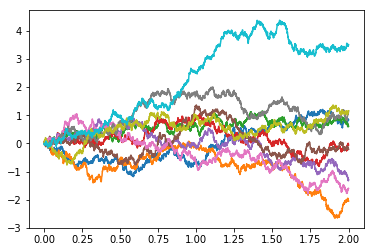

In [11]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

class SDE:
    def __init__(self, Mu, Sigma, InitState):
        self.Mu = Mu
        self.Sigma = Sigma
        self.InitState = InitState
        
    def PrtCoef(self, x, t):
        print('At state x = ' + str(x) + ' time t = ' + str(t) + '\n')
        print('Mu ' + str(self.Mu(x, t)) + '\n')
        print('Sigma = ' + str(self.Sigma(x, t)) + '\n')
        
    def PrtInitState(self):
        print('Initial state is ' + str(self.InitState) + '\n')
        
    def Euler(self, T, N):
        x0 = self.InitState
        Mu = self.Mu
        Sigma = self.Sigma       
        t = np.linspace(0, T, N+1)
        
        Wh = np.zeros(N+1) #init BM
        Xh = x0 + np.zeros(N+1) #init Xh
        
        for i in range(N): #run EM
            DeltaT = t[i+1] - t[i]
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            Xh[i+1] = Xh[i] + Mu(Xh[i], t[i]) * DeltaT + \
            Sigma(Xh[i], t[i])* DeltaW
            
        return t, Xh, Wh
        
if __name__ == '__main__':
    
    #std BM
    b = lambda x, t: 0.
    sigma = lambda x, t: 1.
    x0 = 0.
    iSDE = SDE(b, sigma, x0)
    iSDE.PrtInitState()
    iSDE.PrtCoef(1., 5.)
    
    for i in range(10): 
        [t, Y, W] = iSDE.Euler(2., 4000); 
        plt.plot(t,Y);

Below, we demonstrate Euler method with SDE class with P254-2-a of [Hir13] as an example

In [12]:
#define function Mu and Sigma
#Here we define as of P254-2-a of [Hir13] for the illustration
r = .0475; sig = .2
Mu = lambda x,t: r*x
Sigma = lambda x,t: sig*x
x0 = 100. #init state

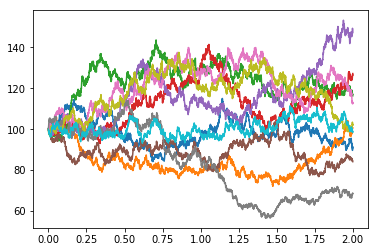

In [13]:
iGBM = SDE(Mu, Sigma, x0)
for i in range(10): 
    [t, Y, W] = iGBM.Euler(2., 4000); 
    plt.plot(t,Y);

In [14]:
#Use MC to compute the put price of p254-2-a
#first define a function of Put payoff
def PutPay(r, T, K, S_T):
    return np.exp(-r*T)*max(0,K-S_T)
T = 5.
K = 110.
MeshL = .005
MeshN = int(T/MeshL)
IterN = 1000

iStk = SDE(Mu, Sigma, x0)

PPay = np.zeros(IterN) #Simulation of payoff

for i in range(IterN):
    [t, Xh, Wh] = iStk.Euler(T, MeshN);
    PPay[i] = PutPay(r, T, K, Xh[-1])
    
PPrice = PPay.mean()
print(f"The price of the put option buy euler method is {PPrice}.")

The price of the put option buy euler method is 11.665147425154384.


[GBM_V01](https://github.com/songqsh/MA6628v02/blob/master/GBM_V01.py)

Initial state is 10

At state x = 20.0 time t = 5.0

Mu 1.0

Sigma = 4.0

call value is 1.6699448408416009
put value is 0.23100966134802725


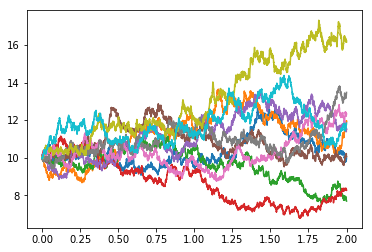

In [15]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
## from SDE_V01 import SDE


class GBM(SDE):
    def __init__(self, Drift, Vol, InitState):
        self.Drift = Drift #scalar
        self.Vol = Vol #scalar
        self.InitState = InitState
        self.Mu = lambda x, t: Drift * x
        self.Sigma = lambda x, t: Vol * x
        
    def _explicit_sol_(self, t, W_t): ## the exact value of the asset X at time t
        x0 = self.InitState
        b = self.Drift
        sigma = self.Vol
        return x0 * np.exp((b - sigma**2/2.) * t + sigma * W_t)
    
    def _Call_(self, K, T):
        x0 = self.InitState
        b = self.Drift
        sigma = self.Vol
        d1 =(np.log(x0 / K) + (b + 0.5 * sigma ** 2)\
               * T)/ (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        call_value = x0 * ss.norm.cdf(d1) - np.exp(-b * T\
                                     ) * K * ss.norm.cdf(d2)
        return call_value
    
    def _Put_(self, K, T):
        x0 = self.InitState
        b = self.Drift
        put_value = self._Call_(K, T) - x0 + np.exp(-b * T) * K
        return put_value
        
if __name__ == "__main__":
    iGBM = GBM(.05, .2, 10)  ## iGBM is a object of the class GBM, where drift = 0.05, volitility = 0.2, initial value = 10
    iGBM.PrtInitState()
    iGBM.PrtCoef(20., 5.)
    
    #plot a figure of ten paths
    for i in range(10): 
        [t, Y, W] = iGBM.Euler(2., 4000);   ## use the method Euler in the class GBM, where T= 2, the part of the path is 4000
        plt.plot(t,Y);
        
      
    callvalue = iGBM._Call_(9, 1.)
    print('call value is ' + str(callvalue))
    putvalue = iGBM._Put_(9, 1)
    print('put value is ' + str(putvalue))

In [16]:
iGBM01 = GBM(r, sig, x0)
iPut = iGBM01._Put_(K, T)
print(iPut)

10.706583768786942


In [17]:
ArrayN = np.arange(8)
startn = 4
ArrayErr = np.zeros(ArrayN.size)
T = 1.

iGBM = GBM(.05, .2, 10)

for n in ArrayN:
    MeshNum = np.power(2, n+startn)  ## the value of 2^(n+startn)
    SampleNum = 200
    errsum = 0
    for i in range(SampleNum):
        [t, Xh, Wh] = iGBM.Euler(T, MeshNum)
        XhT = Xh[-1]
        XT = iGBM._explicit_sol_(T, Wh[-1])  ## the exact value of the asset X at time T
        errsum = errsum + np.abs(XhT - XT)
    ArrayErr[n] = errsum/SampleNum

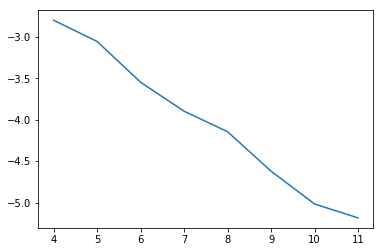

In [18]:
plt.plot(ArrayN+startn, np.log(ArrayErr))

In [19]:
(np.log(ArrayErr[-1]) - np.log(ArrayErr[0]))/(ArrayN[-1] - ArrayN[0])

-0.3406901972042628

-0.3474870849266111

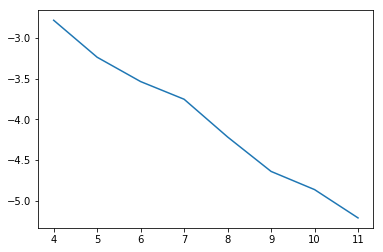

In [23]:
ArrayN = np.arange(8)
startn = 4
ArrayErr = np.zeros(ArrayN.size)
T = 1.

iGBM = GBM(.05, .2, 10)

for n in ArrayN:
    MeshNum = np.power(2, n+startn)  ## the value of 2^(n+startn)
    SampleNum = 200
    errsum = 0
    for i in range(SampleNum):
        [t, Xh, Wh] = iGBM.Euler(T, MeshNum)
        XhT = Xh[-1]
        XT = iGBM._explicit_sol_(T, Wh[-1])  ## the exact value of the asset X at time T
        errsum = errsum + np.abs(XhT - XT)
    ArrayErr[n] = errsum/SampleNum
    
plt.plot(ArrayN+startn, np.log(ArrayErr))
(np.log(ArrayErr[-1]) - np.log(ArrayErr[0]))/(ArrayN[-1] - ArrayN[0])

## (3)Euler Method 3

We use Euler scheme to simulate a path for SDE of the form

$$X(t) = x_0 + \int_0^t \mu(X(s), s)ds + \int_0^t \sigma(X(s), s)dW(s).$$

__Ref__

[Hir13] Computational Methods in Finance

Section 6.6.1 of [Hir13] provides Euler schemem as follows:
One can produce a sequence of pairs $(t_j, \hat X_j): j = 0, 1, \ldots$ by

$$\hat X_{j+1} = \hat X_j + \mu(\hat X_j, t_j) \Delta t_j + \sigma(\hat X_j, t_j) \sqrt{\Delta t_j} Z_j,$$

where
$\Delta t_j = t_{j+1} - t_j$ and $(Z_j)_{j\ge 0}$ is iid standard normal variables.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

__Next, we show 10 simulation for the BM__

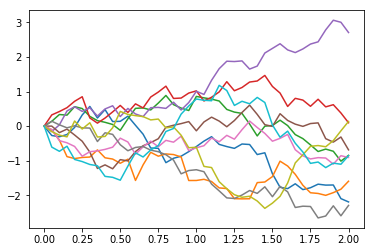

In [25]:
#std BM
b = lambda x, t: 0.
sigma = lambda x, t: 1.
x0 = 0.
iSDE = SDE(b, sigma, x0)

NumSimu = 10
for i in range(NumSimu):
    [t, Y, W] = iSDE.Euler(2., 40); 
    plt.plot(t,Y);

Below, we demonstrate Euler method with SDE class with P254-2-a of [Hir13] as an example

In [26]:
## %reset -f
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#define function Mu and Sigma
#Here we define as of P254-2-a of [Hir13] for the illustration
r = .0475 
sig = .2
x0 = 100. #init state
T = 1.
K = 110.

[GBM_V02](https://github.com/songqsh/MA6628v02/blob/master/GBM_V02.py)

call value is 5.943273183452838
put value is 10.840425228041752


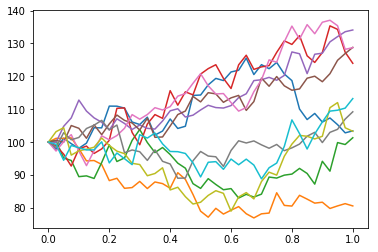

In [28]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt


class GBM(SDE):
    def __init__(self, Drift, Vol, InitState):
        self.Drift = Drift #scalar
        self.Vol = Vol #scalar
        self.InitState = InitState
        self.Mu = lambda x, t: Drift * x
        self.Sigma = lambda x, t: Vol * x
        
    def _explicit_sol_(self, t, W_t):
        x0 = self.InitState
        b = self.Drift
        sigma = self.Vol
        return x0 * np.exp((b - sigma**2/2.) * t + sigma * W_t)
    
    def _Call_(self, K, T):
        x0 = self.InitState
        b = self.Drift
        sigma = self.Vol
        d1 = (np.log(x0 / K) + \
              (b + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        call_value = x0 * ss.norm.cdf(d1) - \
            np.exp(-b * T) * K * ss.norm.cdf(d2)
        return call_value
    
    def _Put_(self, K, T):
        x0 = self.InitState
        b = self.Drift
        put_value = self._Call_(K, T) - x0 + np.exp(-b * T) * K
        return put_value
        
if __name__ == "__main__":
    
    S0 = 100.0
    K = 110.0
    r=0.0475
    sigma = 0.20
    t = 0.
    T = 1.
    
    iGBM = GBM(r, sigma, S0)
    
    #plot a figure of ten paths
    for i in range(10): 
        [t, Y, W] = iGBM.Euler(T, 40); 
        plt.plot(t,Y);
        
      
    callvalue = iGBM._Call_(K, T)
    print('call value is ' + str(callvalue))
    putvalue = iGBM._Put_(K, T)
    print('put value is ' + str(putvalue))

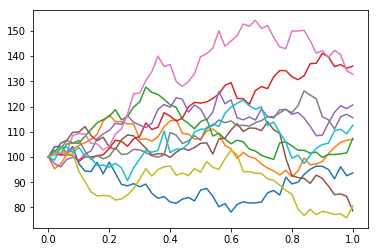

In [29]:
iGBM = GBM(r, sig, x0)
NumSimu = 10
for i in range(NumSimu): 
    [t, Y, W] = iGBM.Euler(T, 50); 
    plt.plot(t,Y);

### __Below is the evaluation of Put by Euler method__

In [30]:
#Use MC to compute the put price of p254-2-a
#first define a function of Put payoff
def DiscPutPayoff(r, T, K, S_T):
    return np.exp(-r*T)*max(0,K-S_T)

NumMesh = 100
NumSimu = 10000

DiscPutPayoffArray = np.zeros(NumSimu) #Simulation of payoff

for i in range(NumSimu):
    [t, Xh, Wh] = iGBM.Euler(T, NumMesh);
    DiscPutPayoffArray[i] = DiscPutPayoff(r, T, K, Xh[-1])
    
PutPrice = DiscPutPayoffArray.mean()   
print('Put price by EM is ' + str(PutPrice))

Put price by EM is 10.82134148070845


__Below is the evaluation of Put by BS formula__

In [31]:
iPut = iGBM._Put_(K, T)
print('Put price by BS formula is ' + str(iPut))

Put price by BS formula is 10.840425228041752


__Next we calculate the convergence order__

In [32]:
ArrLog2Steps = np.arange(8)
NumMinLog2Steps = 4 #Put will be calucated with different step numbers: 2**NumLog2Steps

#ArrayN = np.arange(8)
#startn = 4
ArrErr = np.zeros(ArrLog2Steps.size)
T = 1.

In [33]:
NumSimu = 200
for n in ArrLog2Steps:
    NumMesh = np.power(2, n + NumMinLog2Steps)
    errsum = 0
    for i in range(NumSimu):
        [t, Xh, Wh] = iGBM.Euler(T, NumMesh)
        XhT = Xh[-1]
        XT = iGBM._explicit_sol_(T, Wh[-1])
        errsum = errsum + np.abs(XhT - XT)
    ArrErr[n] = errsum/NumSimu

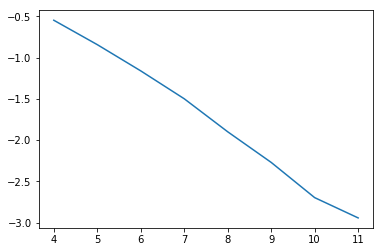

In [34]:
from scipy import stats

x_coordinate = ArrLog2Steps+NumMinLog2Steps
y_coordinate = np.log(ArrErr)

plt.plot(x_coordinate, y_coordinate)

In [35]:
lg = stats.linregress(x_coordinate,y_coordinate)
rate = -lg[0]
print('rate is '+ str(rate))

rate is 0.3543638361281421
